**loading data**

In [8]:
import pandas as pd

In [9]:
df=pd.read_csv("/content/data/daily-min-temperatures.csv",header=0,parse_dates=[0])

In [10]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [11]:
df.shape

(3650, 2)

## **persistance model**

in this model -> last period value is the forecast for this value

In [13]:
df['t']=df['Temp'].shift(1)

In [14]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [17]:
train=df[1:df.shape[0]-7]

In [ ]:
test=df[df.shape[0]-7:]

In [18]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [19]:
train_X , train_Y= train['t'],train['Temp']  # X-> t and Y->temp

In [22]:
train_X.head()

,t
1,20.7
2,17.9
3,18.8
4,14.6
5,15.8


In [23]:
train_Y.head()

,Temp
1,17.9
2,18.8
3,14.6
4,15.8
5,15.8


In [20]:
test_X , test_Y =test['t'],test['Temp']

In [25]:
test_X.head()

,t
3643,10.0
3644,12.9
3645,14.6
3646,14.0
3647,13.6


In [26]:
test_Y.head()

,Temp
3643,12.9
3644,14.6
3645,14.0
3646,13.6
3647,13.5


**walk forward validation**

In [28]:
predictions=test_X.copy()

In [33]:
print(predictions) #predicted values

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64


In [34]:
print(test_Y) # actual values

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


you can see actual values 3643 index in test_Y variable is the predicted value for index 3644 in prediction variable

In [35]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_Y,predictions)

In [36]:
mse

3.4228571428571413

**plotting**

In [38]:
import matplotlib.pyplot as plt

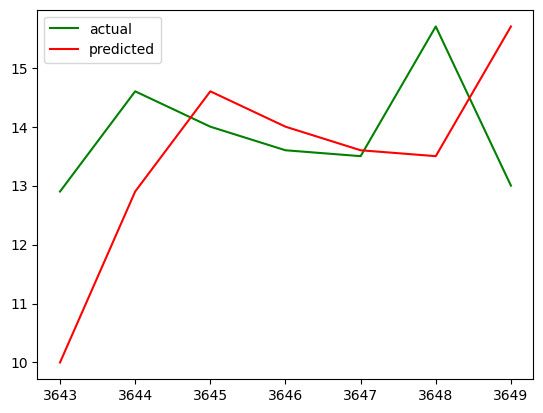

In [43]:

import matplotlib.pyplot as plt

plt.plot(test_Y, color="green", label="actual")
plt.plot(predictions, color="red", label="predicted")
plt.legend()
plt.show()


if any other model has mse greater than this  than it shows that the time series is a random walk -> model not able to extract any information


if any other model has mse less than this  than it shows that the stime series is not a random walk

**why naive forecasts mse value is important because it will tell you whether your data is a random walk or not.**